In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

mod_path = os.path.abspath(os.path.join('..', '..', '..'))
if mod_path not in sys.path:
    sys.path.insert(0, mod_path)

from ex1.python.libs import *

In [3]:
mpl.rcParams['figure.dpi'] = 150

# Part 1: Basic Function
Running warmUpExercise

5x5 Identity Matrix

In [4]:
warm_up_exercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# Part 2: Plotting

In [34]:
data = np.loadtxt('../../data/ex1data1.txt', delimiter=',', usecols=(0, 1))
X = data[:, 0].reshape(-1, 1)
y = data[:, 1]
m = np.size(X, 0)

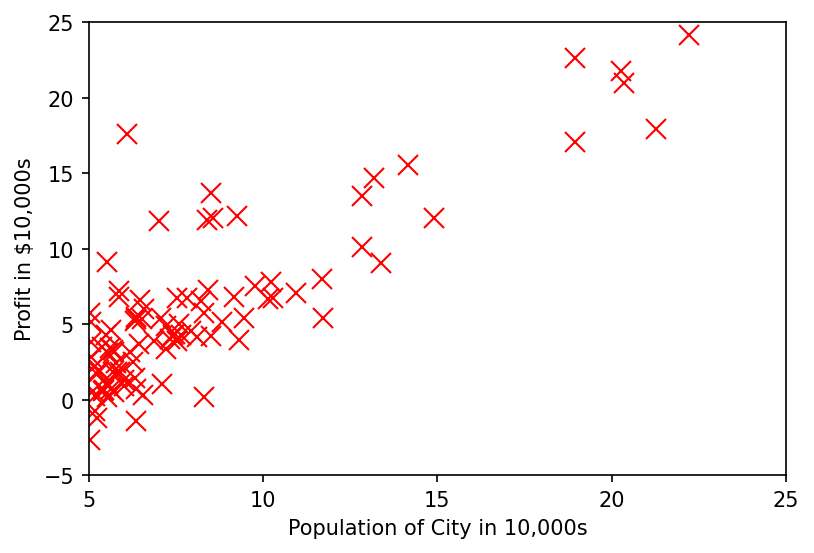

In [11]:
ax = plot_data(X, y)
ax.set(
    xlim=(5, 25), xticks=np.arange(5, 30, 5),
    ylim=(-5, 25), yticks=np.arange(-5, 30, 5),
    xlabel='Population of City in 10,000s',
    ylabel='Profit in $10,000s'
);

# Part 3: Gradient descent

In [43]:
theta = np.zeros(2)
iterations = 1500
alpha = 0.01

In [44]:
print(compute_cost(patch_c0(X), y, theta))
theta, j_history = gradient_descent(patch_c0(X), y, theta, alpha, iterations)

32.072733877455676


In [45]:
print(f'Theta found by GD \n {theta}')

Theta found by GD 
 [-3.63029144  1.16636235]


[Text(0.5, 0, 'iterations'), Text(0, 0.5, '$J(\\theta)$')]

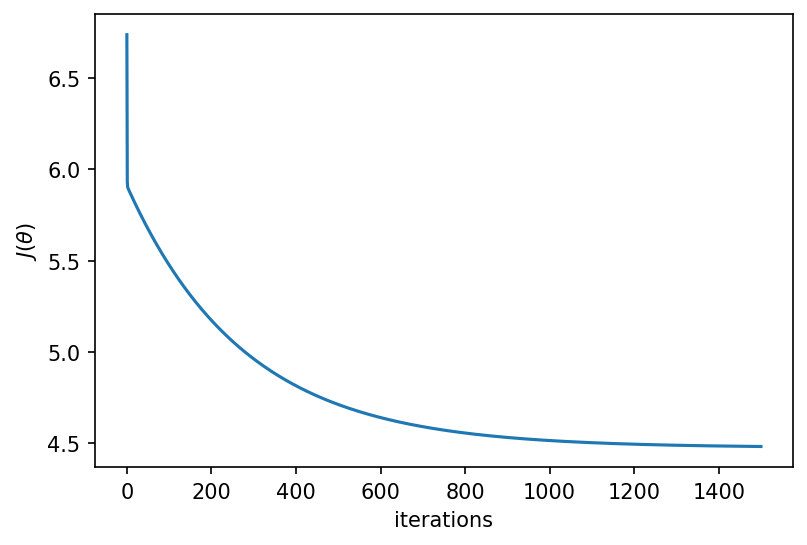

In [46]:
fix, ax = plt.subplots()
ax.plot(np.linspace(0, iterations, iterations), j_history)
ax.set(
    xlabel='iterations',
    ylabel=r'$J(\theta)$'
)

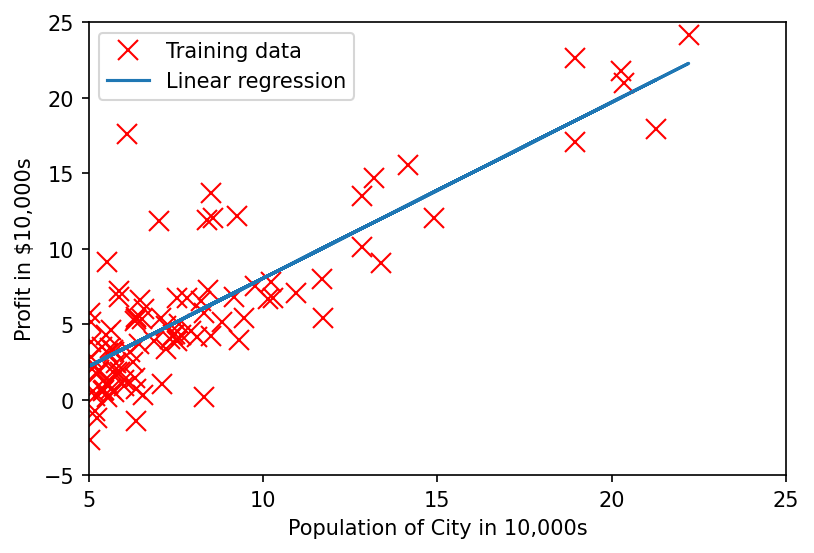

In [68]:
ax = plot_data(X[:, 0], y)
ax.plot(X[:, 0], theta @ patch_c0(X).T, '-')
ax.set(
    xlim=(5, 25), xticks=np.arange(5, 30, 5),
    ylim=(-5, 25), yticks=np.arange(-5, 30, 5),
    xlabel='Population of City in 10,000s',
    ylabel='Profit in $10,000s'
)
ax.legend(['Training data', 'Linear regression']);

In [69]:
predict1 = np.array([1, 3.5]) @ theta.T
predict2 = np.array([1, 7]) @ theta.T
print(f'For population = 35,000, predict profit {predict1*10000}')
print(f'For population = 70,000, predict profit {predict2*10000}')

For population = 35,000, predict profit 4519.7678677017775
For population = 70,000, predict profit 45342.45012944715


# Part 4: Visualizing $J(\theta_0, \theta_1)$

In [74]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.hstack((theta0_vals[i], theta1_vals[j]))
        J_vals[i][j] = compute_cost(patch_c0(X), y, t)

In [75]:
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

In [76]:
J_vals = J_vals.T

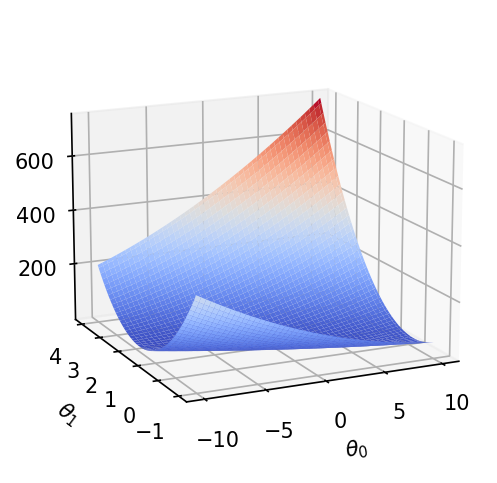

In [82]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
surf = ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap=plt.get_cmap('coolwarm'))
ax.set(
    xlabel=r'$\theta_0$',
    ylabel=r'$\theta_1$'
)
ax.view_init(elev=15, azim=-115)

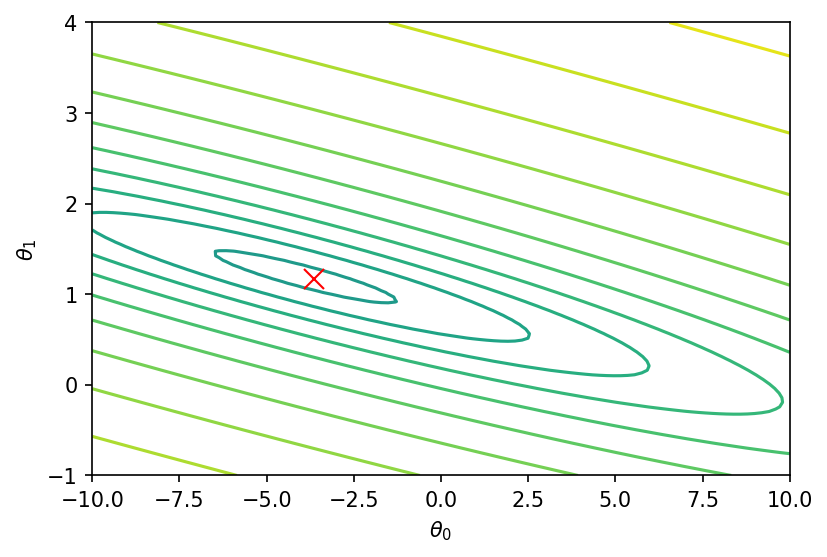

In [79]:
fix, ax = plt.subplots()
ax.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 25), norm=mpl.colors.LogNorm())
ax.set(
    xlabel=r'$\theta_0$',
    ylabel=r'$\theta_1$'
)
ax.plot(theta[0], theta[1], 'rx', markersize=10, linewidth=2);